In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')
# 코랩코드

In [415]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')


In [416]:
#코랩 코드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [417]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [418]:
# 실행결과 경고메시지 출력 제외
import warnings
import platform
warnings.filterwarnings('ignore')

In [419]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
df_raw = pd.read_csv("Car.csv", encoding = 'euc-kr')
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [420]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [421]:
df_raw.info() #데이터 열 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [422]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [423]:
df_raw['Price'].describe()

count      6200.000000
mean      14912.514750
std       17674.318464
min           7.080000
25%        5365.360000
50%        8814.520000
75%       15869.972500
max      245273.600000
Name: Price, dtype: float64

In [424]:
#결측치 처리
df = df_raw
df.drop(labels = 'New_Price', axis = 1, inplace = True) #New_Price의 결측값이 너무 많이 발견되어, New_Price 열을 삭제하기로 결정

In [425]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [426]:
df.dropna(subset = ['Price'], inplace = True) #Price의 결측값 삭제 (목표변수)

In [427]:
df[df['Mileage'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0


네임과 fuel 이 모두 동일 한게 없다. Drop

In [428]:
df.dropna(subset = ['Mileage'], inplace = True)

In [429]:
df[df['Engine'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [430]:
df[df['Engine'].isnull()].merge(
    df,
    on=['Name', 'Fuel_Type', 'Year'],
    how='inner',
    suffixes=('_null', '_match')
)

,Name,Location_null,Price_null,Year,Kilometers_Driven_null,Fuel_Type,Transmission_null,Owner_Type_null,Mileage_null,Engine_null,...,Seats_null,Location_match,Price_match,Kilometers_Driven_match,Transmission_match,Owner_Type_match,Mileage_match,Engine_match,Power_match,Seats_match
0,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,...,NaN,Ahmedabad,4522.23,60006,Manual,First,0.0 kmpl,NaN,NaN,NaN
1,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,...,NaN,Jaipur,3525.81,75055,Manual,First,12.8 kmpl,1493 CC,100 bhp,5.0
2,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,...,NaN,Kolkata,3234.55,42001,Manual,First,16.1 kmpl,NaN,NaN,NaN
3,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Chennai,2682.68,97800,Manual,Third,16.1 kmpl,NaN,NaN,NaN
4,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Jaipur,3602.46,125000,Manual,Fourth & Above,16.1 kmpl,NaN,NaN,NaN
5,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,...,NaN,Delhi,2452.74,63000,Manual,First,16.1 kmpl,NaN,NaN,NaN
6,Maruti Swift 1.3 VXi,Jaipur,3602.46,2006,125000,Petrol,Manual,Fourth & Above,16.1 kmpl,NaN,...,NaN,Chennai,2682.68,97800,Manual,Third,16.1 kmpl,NaN,NaN,NaN
7,Maruti Swift 1.3 VXi,Jaipur,3602.46,2006,125000,Petrol,Manual,Fourth & Above,16.1 kmpl,NaN,...,NaN,Jaipur,3602.46,125000,Manual,Fourth & Above,16.1 kmpl,NaN,NaN,NaN
8,Maruti Swift 1.3 VXi,Jaipur,3602.46,2006,125000,Petrol,Manual,Fourth & Above,16.1 kmpl,NaN,...,NaN,Delhi,2452.74,63000,Manual,First,16.1 kmpl,NaN,NaN,NaN
9,Maruti Swift 1.3 VXi,Delhi,2452.74,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,...,NaN,Chennai,2682.68,97800,Manual,Third,16.1 kmpl,NaN,NaN,NaN


In [431]:
# 각 그룹별 고유한 Engine 값 개수를 확인
engine_counts = df.groupby(['Name', 'Fuel_Type', 'Year'])['Engine'].nunique()

# 고유한 Engine 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = engine_counts[engine_counts == 1].index

# Engine 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_engine(row):
    if pd.isna(row['Engine']):  # Engine 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Engine 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Engine'].dropna().iloc[0]
    return row['Engine']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Engine'] = df.apply(fill_unique_engine, axis=1)


In [432]:
df[df['Engine'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN
2264,Toyota Etios Liva V,Pune,4522.23,2012,24500,Petrol,Manual,Second,18.3 kmpl,NaN,NaN,NaN


In [433]:
df.isnull().sum()

Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               35
Power                36
Seats                42
dtype: int64

In [434]:
df.dropna(subset = ['Engine'], inplace = True)

In [435]:
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                1
Seats                7
dtype: int64

In [436]:
df[df['Power'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,1493 CC,NaN,NaN


In [437]:
# 각 그룹별 고유한 Engine 값 개수를 확인
Power_counts = df.groupby(['Name'])['Power'].nunique()

# 고유한 Engine 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = Power_counts[Power_counts == 1].index

# Engine 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_engine(row):
    if pd.isna(row['Power']):  # Engine 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Engine 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Power'].dropna().iloc[0]
    return row['Power']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Power'] = df.apply(fill_unique_engine, axis=1)


In [438]:
df[df['Power'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0 kmpl,1493 CC,NaN,NaN


In [439]:
df.dropna(subset = ['Power'], inplace = True)

In [440]:
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
dtype: int64

In [441]:
# 각 그룹별 고유한 Seats 값 개수를 확인
Seats_counts = df.groupby(['Name'])['Seats'].nunique()

# 고유한 Seats 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = Seats_counts[Seats_counts == 1].index

# Seats 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체
def fill_unique_Seats(row):
    if pd.isna(row['Seats']):  # Seats 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Seats 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                              (df['Fuel_Type'] == row['Fuel_Type']) &
                              (df['Year'] == row['Year']), 'Seats'].dropna().iloc[0]
    return row['Seats']  # 조건을 만족하지 않으면 원래 값 유지

# 적용
df['Seats'] = df.apply(fill_unique_Seats, axis=1)

In [442]:
df[df['Seats'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
229,Ford Figo Diesel,Bangalore,5518.66,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN
1917,Honda City 1.5 EXI,Jaipur,2606.03,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN
2369,Maruti Estilo LXI,Chennai,2299.44,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN
3800,Ford Endeavour Hurricane LE,Mumbai,10730.72,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN
3882,Maruti Estilo LXI,Kolkata,3832.40,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN
5893,Maruti Estilo LXI,Chennai,2682.68,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN


In [443]:
df.dropna(subset = ['Seats'], inplace = True)

In [444]:
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

df 결측치 처리 완료된 데이터 프레임

#이상치

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [446]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [447]:
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [448]:
df['Model'] = df['Name'].apply(lambda x: x.split()[0])
df[df.index == 76]


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,Ford


In [449]:
df['Model'] = df['Name'].apply(lambda x: x.split()[0])
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,Maruti


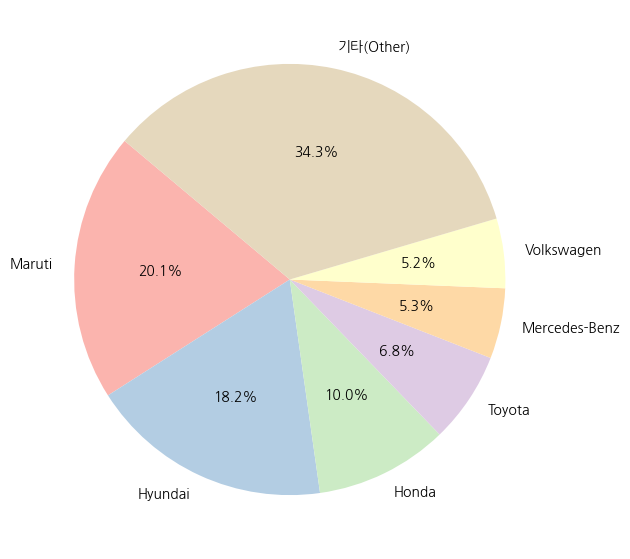

In [450]:
car_counts = df['Model'].value_counts()
total_count = car_counts.sum()
threshold = 0.05 * total_count
filtered_counts = car_counts[car_counts > threshold]
other_count = car_counts[car_counts <= threshold].sum()
if other_count > 0:
    filtered_counts['기타(Other)'] = other_count
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(filtered_counts))]
plt.figure(figsize=(7, 7))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

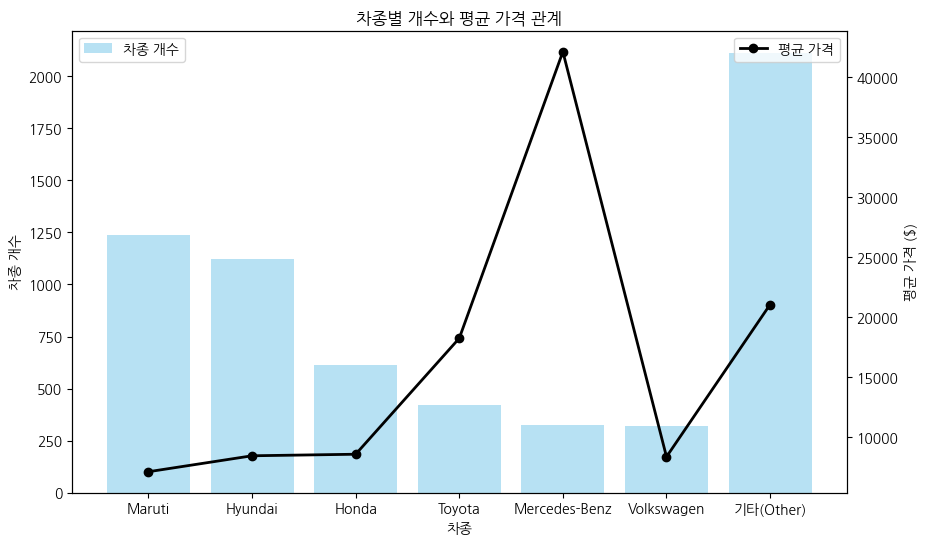

In [451]:
car_counts = df['Model'].value_counts()
total_count = car_counts.sum()
threshold = 0.05 * total_count
filtered_counts = car_counts[car_counts > threshold]
other_count = car_counts[car_counts <= threshold].sum()
if other_count > 0:
    filtered_counts['기타(Other)'] = other_count
average_prices = df.groupby('Model')['Price'].mean()

# '기타' 항목의 평균 가격 계산 (해당 차종들의 평균 가격을 가중 평균으로 합산)
if other_count > 0:
    other_avg_price = df[df['Model'].isin(car_counts[car_counts <= threshold].index)]['Price'].mean()
    average_prices.loc['기타(Other)'] = other_avg_price

# 필터링된 차종의 평균 가격만 가져오기
filtered_avg_prices = average_prices.loc[filtered_counts.index]

# 시각화: 차종별 개수 & 평균 가격 비교
fig, ax1 = plt.subplots(figsize=(10, 6))

# 바 그래프 (차종별 개수)
color1 = 'skyblue'
ax1.bar(filtered_counts.index, filtered_counts.values, color=color1, alpha=0.6, label='차종 개수')
ax1.set_xlabel('차종')
ax1.set_ylabel('차종 개수', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 가격 축 (차종별 평균 가격)
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(filtered_avg_prices.index, filtered_avg_prices.values, color=color2, marker='o', linestyle='-', linewidth=2, label='평균 가격')
ax2.set_ylabel('평균 가격 ($)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# 타이틀 및 레전드 추가
plt.title('차종별 개수와 평균 가격 관계')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [452]:
# 모델별 개수 계산
car_counts = df['Model'].value_counts()

# 총 개수 및 임계값 계산
total_count = car_counts.sum()
threshold = 0.04 * total_count  # 빈도수가 전체의 5% 이하인 경우 'Other'로 변경

# 임계값 이하 모델을 "Other"로 변경
df['Model'] = df['Model'].apply(lambda x: x if car_counts[x] > threshold else 'Other')
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,Other
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,Other
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,Maruti


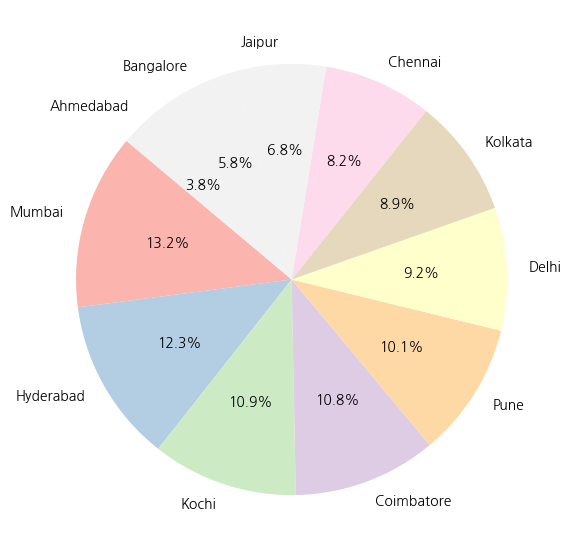

In [453]:
df_location = df["Location"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(7, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

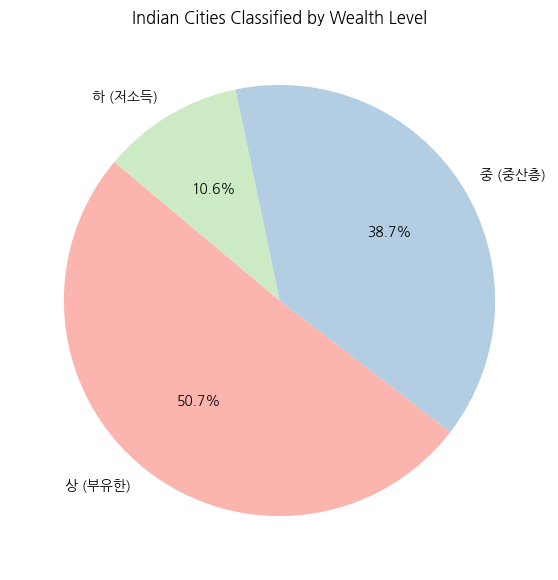

In [454]:
import matplotlib.pyplot as plt
import pandas as pd

# 기존 데이터에서 지역별 개수 추출
df_location = df["Location"].value_counts()

# 📌 지역 그룹화 기준 (상, 중, 하)
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

# 📌 부유한(상), 중산층(중), 저소득(하)으로 그룹화
category_counts = {"상 (부유한)": 0, "중 (중산층)": 0, "하 (저소득)": 0}

for location, count in df_location.items():
    if location in rich_areas:
        category_counts["상 (부유한)"] += count
    elif location in middle_areas:
        category_counts["중 (중산층)"] += count
    elif location in poor_areas:
        category_counts["하 (저소득)"] += count

# 📌 데이터프레임으로 변환
df_grouped = pd.Series(category_counts)

# 📌 파이 차트 색상 설정
cmap = plt.get_cmap("Pastel1")
colors = [cmap(i) for i in range(len(df_grouped))]

# 📌 파이 차트 생성
plt.figure(figsize=(7, 7))
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Indian Cities Classified by Wealth Level")
plt.show()


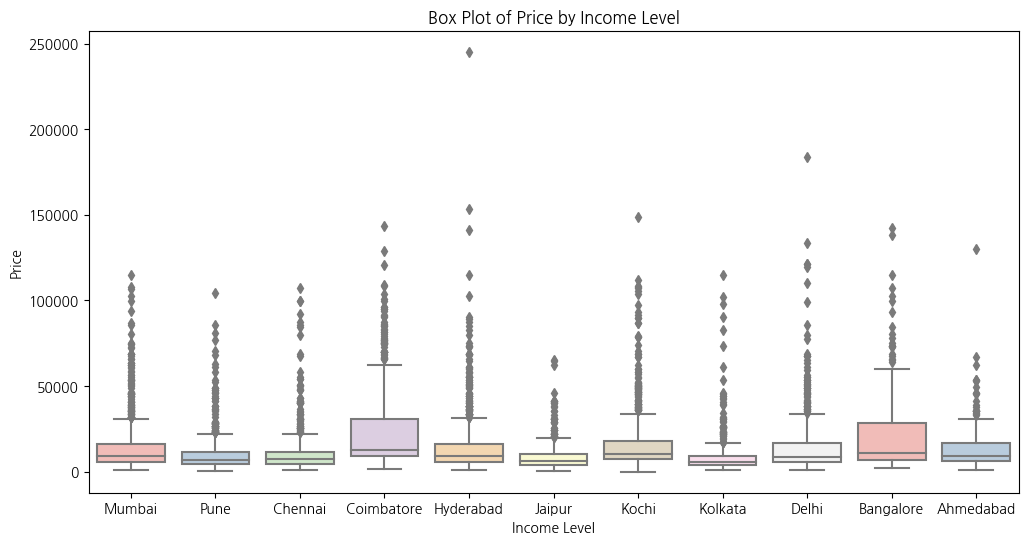

In [455]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

In [456]:
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

def classify_income(location):
    if location in rich_areas:
        return "상 (부유한)"
    elif location in middle_areas:
        return "중 (중산층)"
    elif location in poor_areas:
        return "하 (저소득)"
    else:
        return "기타"

df["Income_Level"] = df["Location"].apply(classify_income)
df.drop(["Location"],axis=1,inplace=True)

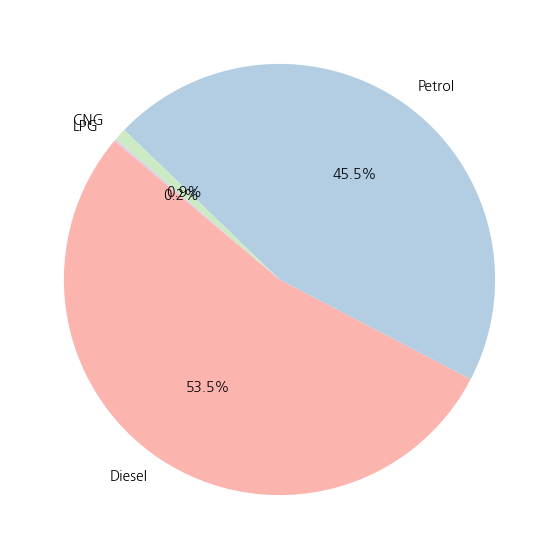

In [457]:
df_location = df["Fuel_Type"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(15, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

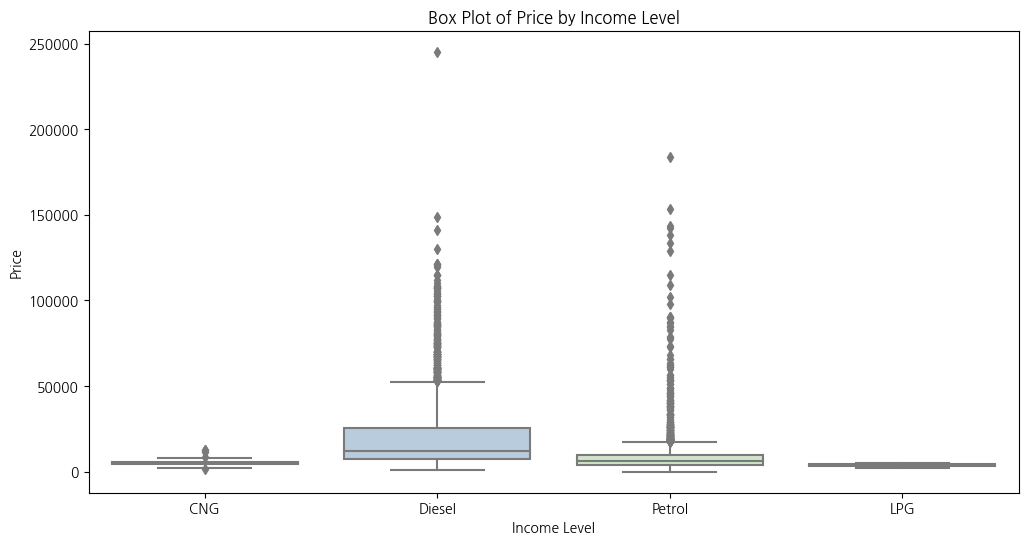

In [458]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuel_Type", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

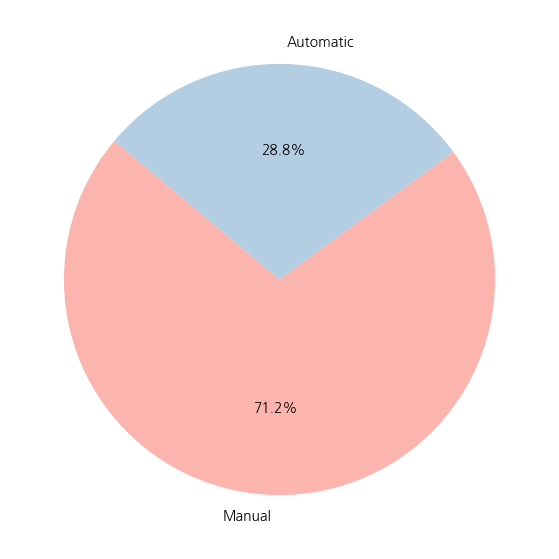

In [459]:
df_location = df["Transmission"].value_counts()
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in range(len(df_location))]
plt.figure(figsize=(15, 7))
plt.pie(df_location, labels=df_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()

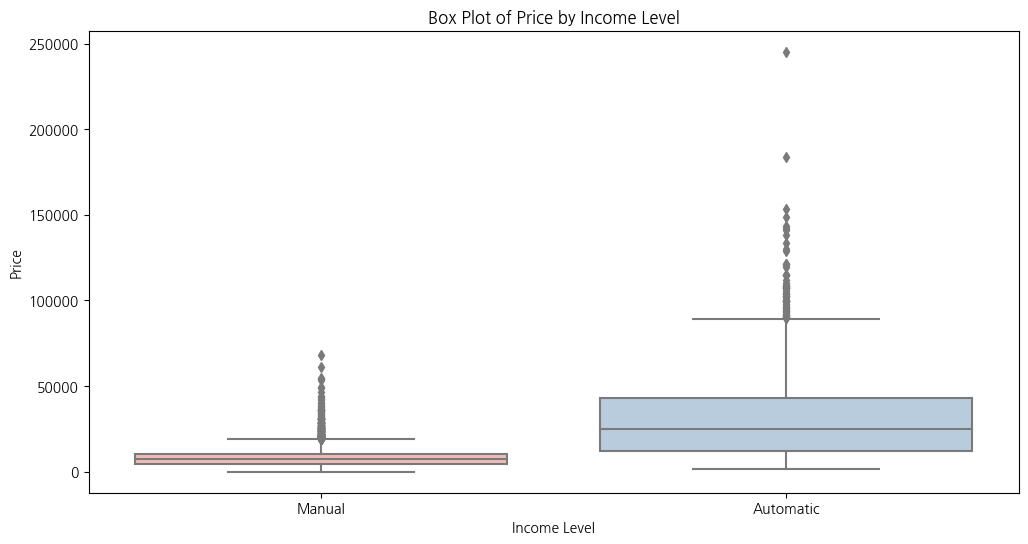

In [460]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

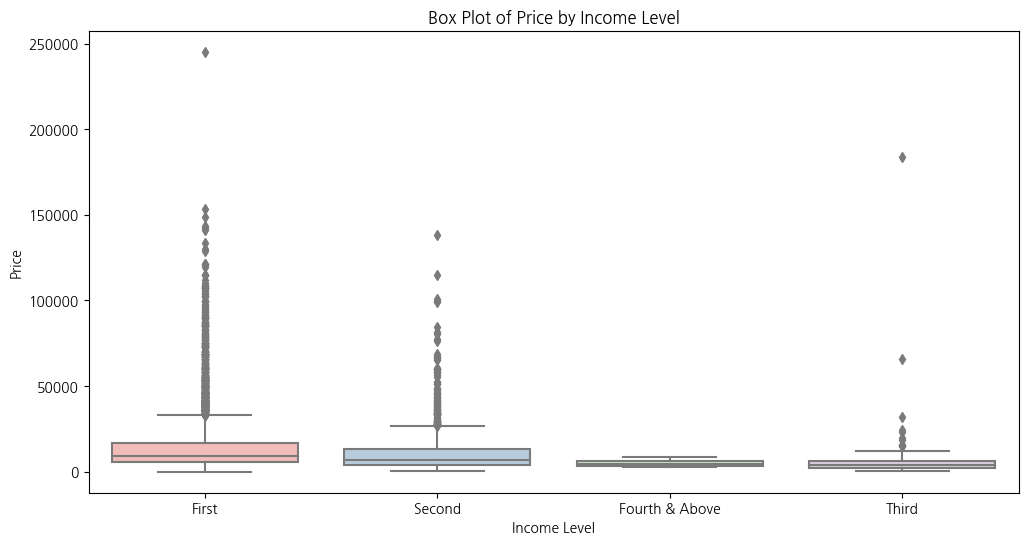

In [461]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Owner_Type", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

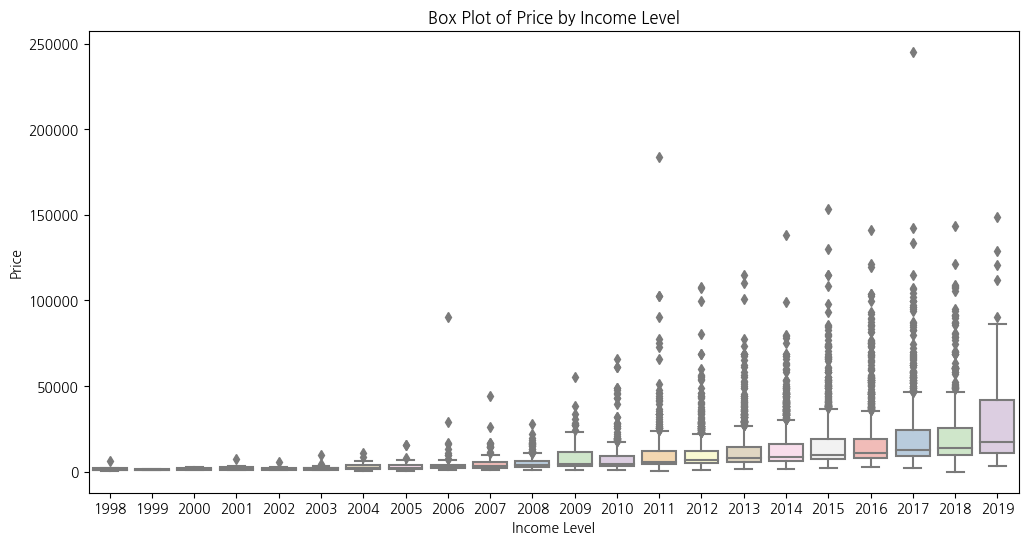

In [462]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Price", data=df, palette="Pastel1")
plt.xlabel("Income Level")
plt.ylabel("Price")
plt.title("Box Plot of Price by Income Level")
plt.show()

In [463]:
df.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,Hyundai,상 (부유한)
2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,Honda,중 (중산층)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,Other,중 (중산층)


#이상치 제거

In [464]:
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype(float)  # 정수지만 float 처리
df['Power'] = df['Power'].str.extract(r'(\d+\.?\d*)').astype(float)


# power null 값 103개 다시 생성됨

In [465]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
76,Ford Fiesta 1.4 SXi TDCi,3065.92,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,Ford,하 (저소득)
79,Hyundai Santro Xing XL,1992.85,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,Hyundai,상 (부유한)
89,Hyundai Santro Xing XO,3219.22,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,Hyundai,상 (부유한)
120,Hyundai Santro Xing XL eRLX Euro III,1303.02,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,Hyundai,상 (부유한)
143,Hyundai Santro Xing XO eRLX Euro II,2560.04,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,Hyundai,중 (중산층)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,2835.98,2007,79000,Petrol,Manual,First,17.00,1086.0,NaN,5.0,Hyundai,중 (중산층)
5873,Hyundai Santro Xing XO eRLX Euro II,1839.55,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,Hyundai,상 (부유한)
5925,Skoda Laura Classic 1.8 TSI,4368.94,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,Other,상 (부유한)
5943,Mahindra Jeep MM 540 DP,2606.03,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,Mahindra,중 (중산층)


In [466]:
df.isnull().sum()

Name                   0
Price                  0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Model                  0
Income_Level           0
dtype: int64

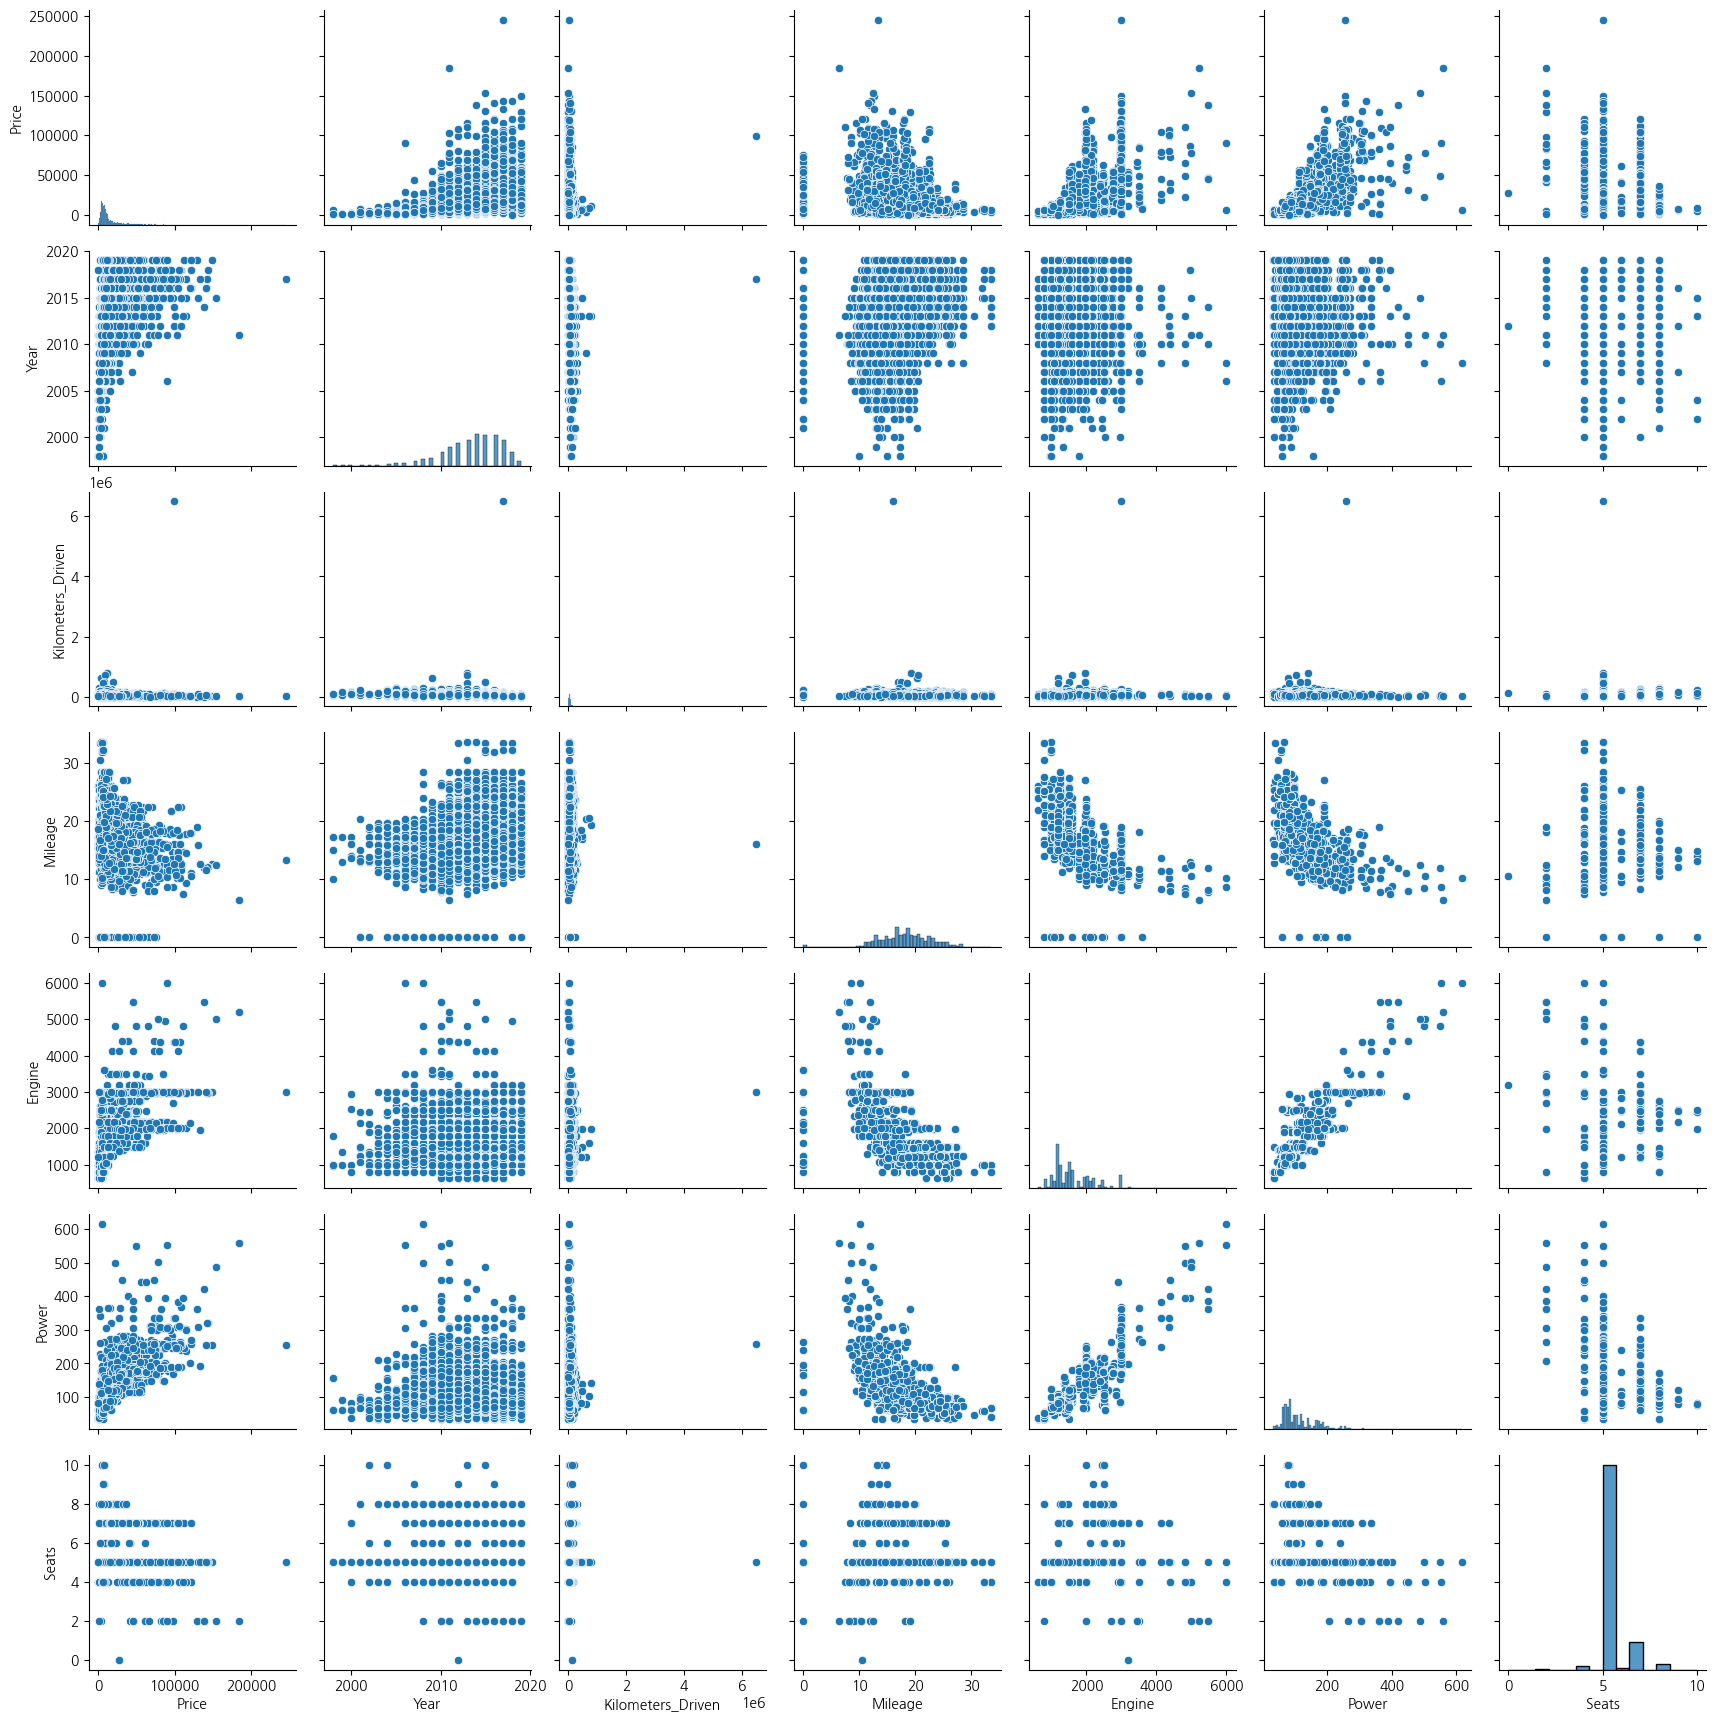

In [467]:
sns.pairplot(df)

In [468]:
df[df['Seats'] == 0] #Seats 수가 0개인 데이터 1개 발견

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
3999,Audi A4 3.2 FSI Tiptronic Quattro,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,Other,상 (부유한)


In [469]:
df = df[df['Seats'] != 0] #Seats수가 0개인 차 삭제(이상치로 판별)

In [470]:
df[df['Mileage'] == 0].count() #Mileage가 0인 값들 발견

Name                 56
Price                56
Year                 56
Kilometers_Driven    56
Fuel_Type            56
Transmission         56
Owner_Type           56
Mileage              56
Engine               56
Power                28
Seats                56
Model                56
Income_Level         56
dtype: int64

In [471]:
# Mileage가 0인 데이터 필터링
mileage_zero = df[df['Mileage'] == 0]

# Mileage가 0이 아닌 데이터 중에서 Name과 Fuel_Type이 동일한 데이터 찾기
valid_mileage = df[(df['Mileage'] > 0) & df[['Model']].apply(tuple, axis=1).isin(mileage_zero[['Model']].apply(tuple, axis=1))]

valid_mileage

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,상 (부유한)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Other,중 (중산층)
5,Hyundai EON LPG Era Plus Option,3602.46,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,Hyundai,상 (부유한)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun GO T Petrol,8477.27,2016,36000,Petrol,Manual,First,19.83,1198.0,67.00,5.0,Other,중 (중산층)
7228,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,Other,상 (부유한)
7232,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,Other,상 (부유한)
7235,Maruti Vitara Brezza ZDi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,Maruti,중 (중산층)


In [472]:
df = df[df['Mileage'] != 0]

<Axes: xlabel='Kilometers_Driven'>

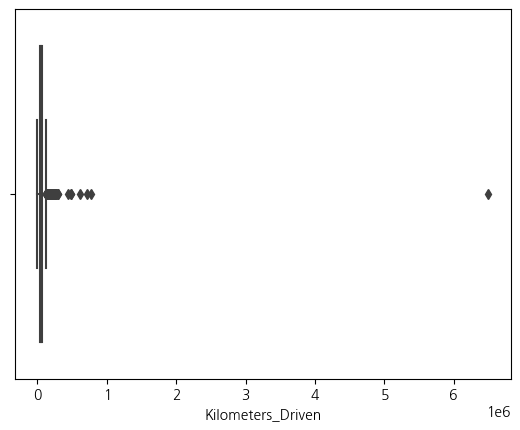

In [473]:
sns.boxplot(x = df['Kilometers_Driven'])

In [474]:
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

# IQR 규칙을 사용하여 이상치를 필터링
df = df[~((df['Kilometers_Driven'] < (Q1 - 4 * IQR)) | (df['Kilometers_Driven'] > (Q3 + 4 * IQR)))]

<Axes: xlabel='Kilometers_Driven'>

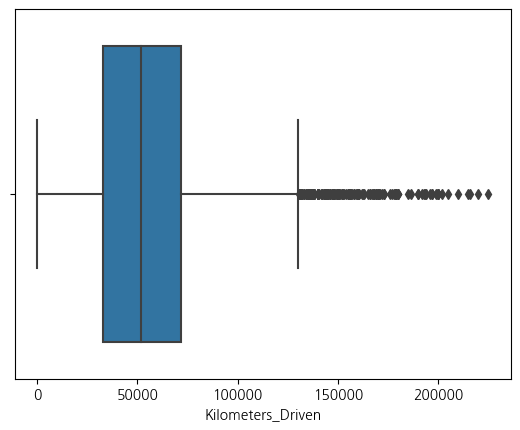

In [475]:
sns.boxplot(x = df['Kilometers_Driven']) #이상치 필터링 후 다시 boxplot 확인

In [476]:
df.isnull().sum()

Name                  0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                74
Seats                 0
Model                 0
Income_Level          0
dtype: int64

In [477]:
df_sorted = df.sort_values(by='Price', ascending=False)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,245273.60,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,Other,상 (부유한)
5781,Lamborghini Gallardo Coupe,183955.20,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,Other,상 (부유한)
5919,Jaguar F Type 5.0 V8 S,153296.00,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,Other,상 (부유한)
1505,Land Rover Range Rover Sport SE,148804.43,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,Other,중 (중산층)
1974,BMW 7 Series 740Li,143592.36,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.0,5.0,BMW,중 (중산층)


In [478]:
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
7236,Hyundai Elite i20 Magna Plus,7.08,2018,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,Hyundai,중 (중산층)
1713,Tata Nano Lx,674.50,2011,65000,Petrol,Manual,Second,26.0,624.0,35.00,4.0,Other,상 (부유한)
1628,Maruti 800 Std BSIII,689.83,2004,12000,Petrol,Manual,Second,16.1,796.0,37.00,4.0,Maruti,하 (저소득)
2847,Hyundai Getz GLS,689.83,2005,86000,Petrol,Manual,Second,15.3,1341.0,83.00,5.0,Hyundai,상 (부유한)
3138,Maruti Zen LXI,689.83,1998,95150,Petrol,Manual,Third,17.3,993.0,60.00,5.0,Maruti,하 (저소득)


In [479]:
df = df[~((df['Name'] == 'Hyundai Elite i20 Magna Plus') & (df_raw['Price'] == 7.08))]


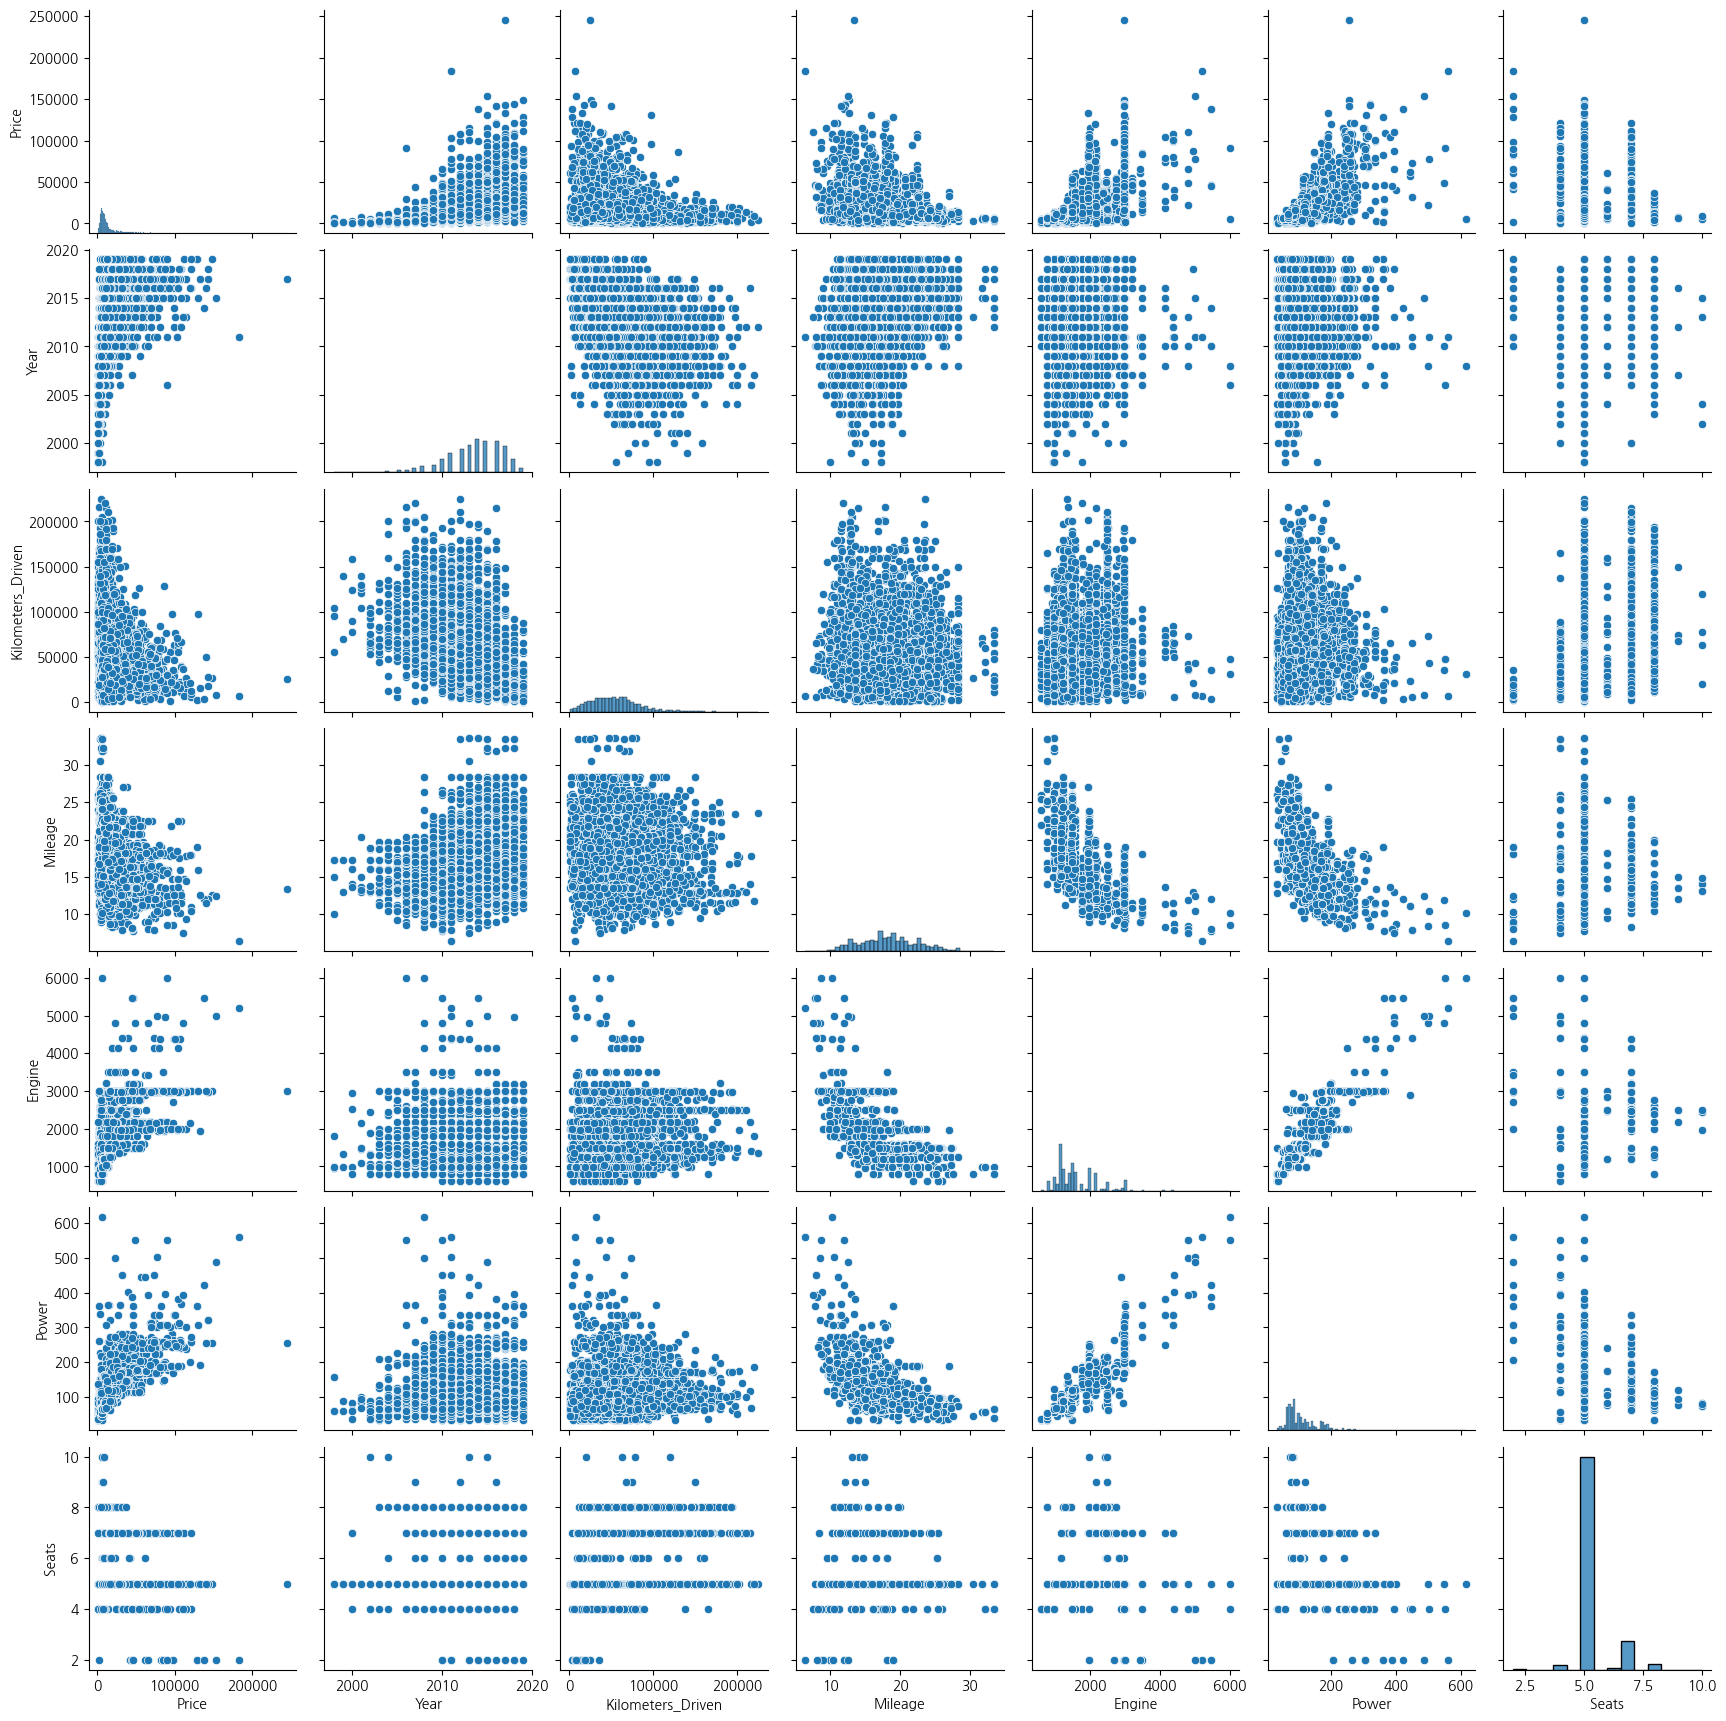

In [480]:
sns.pairplot(df)


In [481]:
df_sorted = df.sort_values(by='Engine', ascending=True)
df_sorted.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
523,Tata Nano Twist XT,1532.96,2014,18000,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Other,하 (저소득)
4965,Tata Nano STD SE,812.47,2012,80000,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Other,하 (저소득)
5468,Tata Nano CX,1931.53,2014,59508,Petrol,Manual,First,25.4,624.0,37.48,4.0,Other,중 (중산층)
4561,Tata Nano Cx BSIV,2575.37,2014,42083,Petrol,Manual,First,25.4,624.0,37.48,4.0,Other,중 (중산층)
5387,Tata Nano Twist XT,3265.20,2015,25811,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Other,중 (중산층)


In [482]:
import numpy as np

# 로그 변환 (log1p 사용하여 0 값 처리)
df['Mileage'] = np.log1p(df['Mileage'])
df['Power'] = np.log1p(df['Power'])
df['Engine'] = np.log1p(df['Engine'])
df

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,상 (부유한)
2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,중 (중산층)
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Other,중 (중산층)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun GO T Petrol,8477.27,2016,36000,Petrol,Manual,First,3.036394,7.089243,4.219508,5.0,Other,중 (중산층)
7228,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,3.342155,6.954639,4.248495,5.0,Other,상 (부유한)
7231,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,Petrol,Manual,First,2.890372,7.311886,4.806968,5.0,Ford,중 (중산층)
7232,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,2.833213,7.221836,5.081404,5.0,Other,상 (부유한)


In [483]:
df.isnull().sum()

Name                  0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                74
Seats                 0
Model                 0
Income_Level          0
dtype: int64

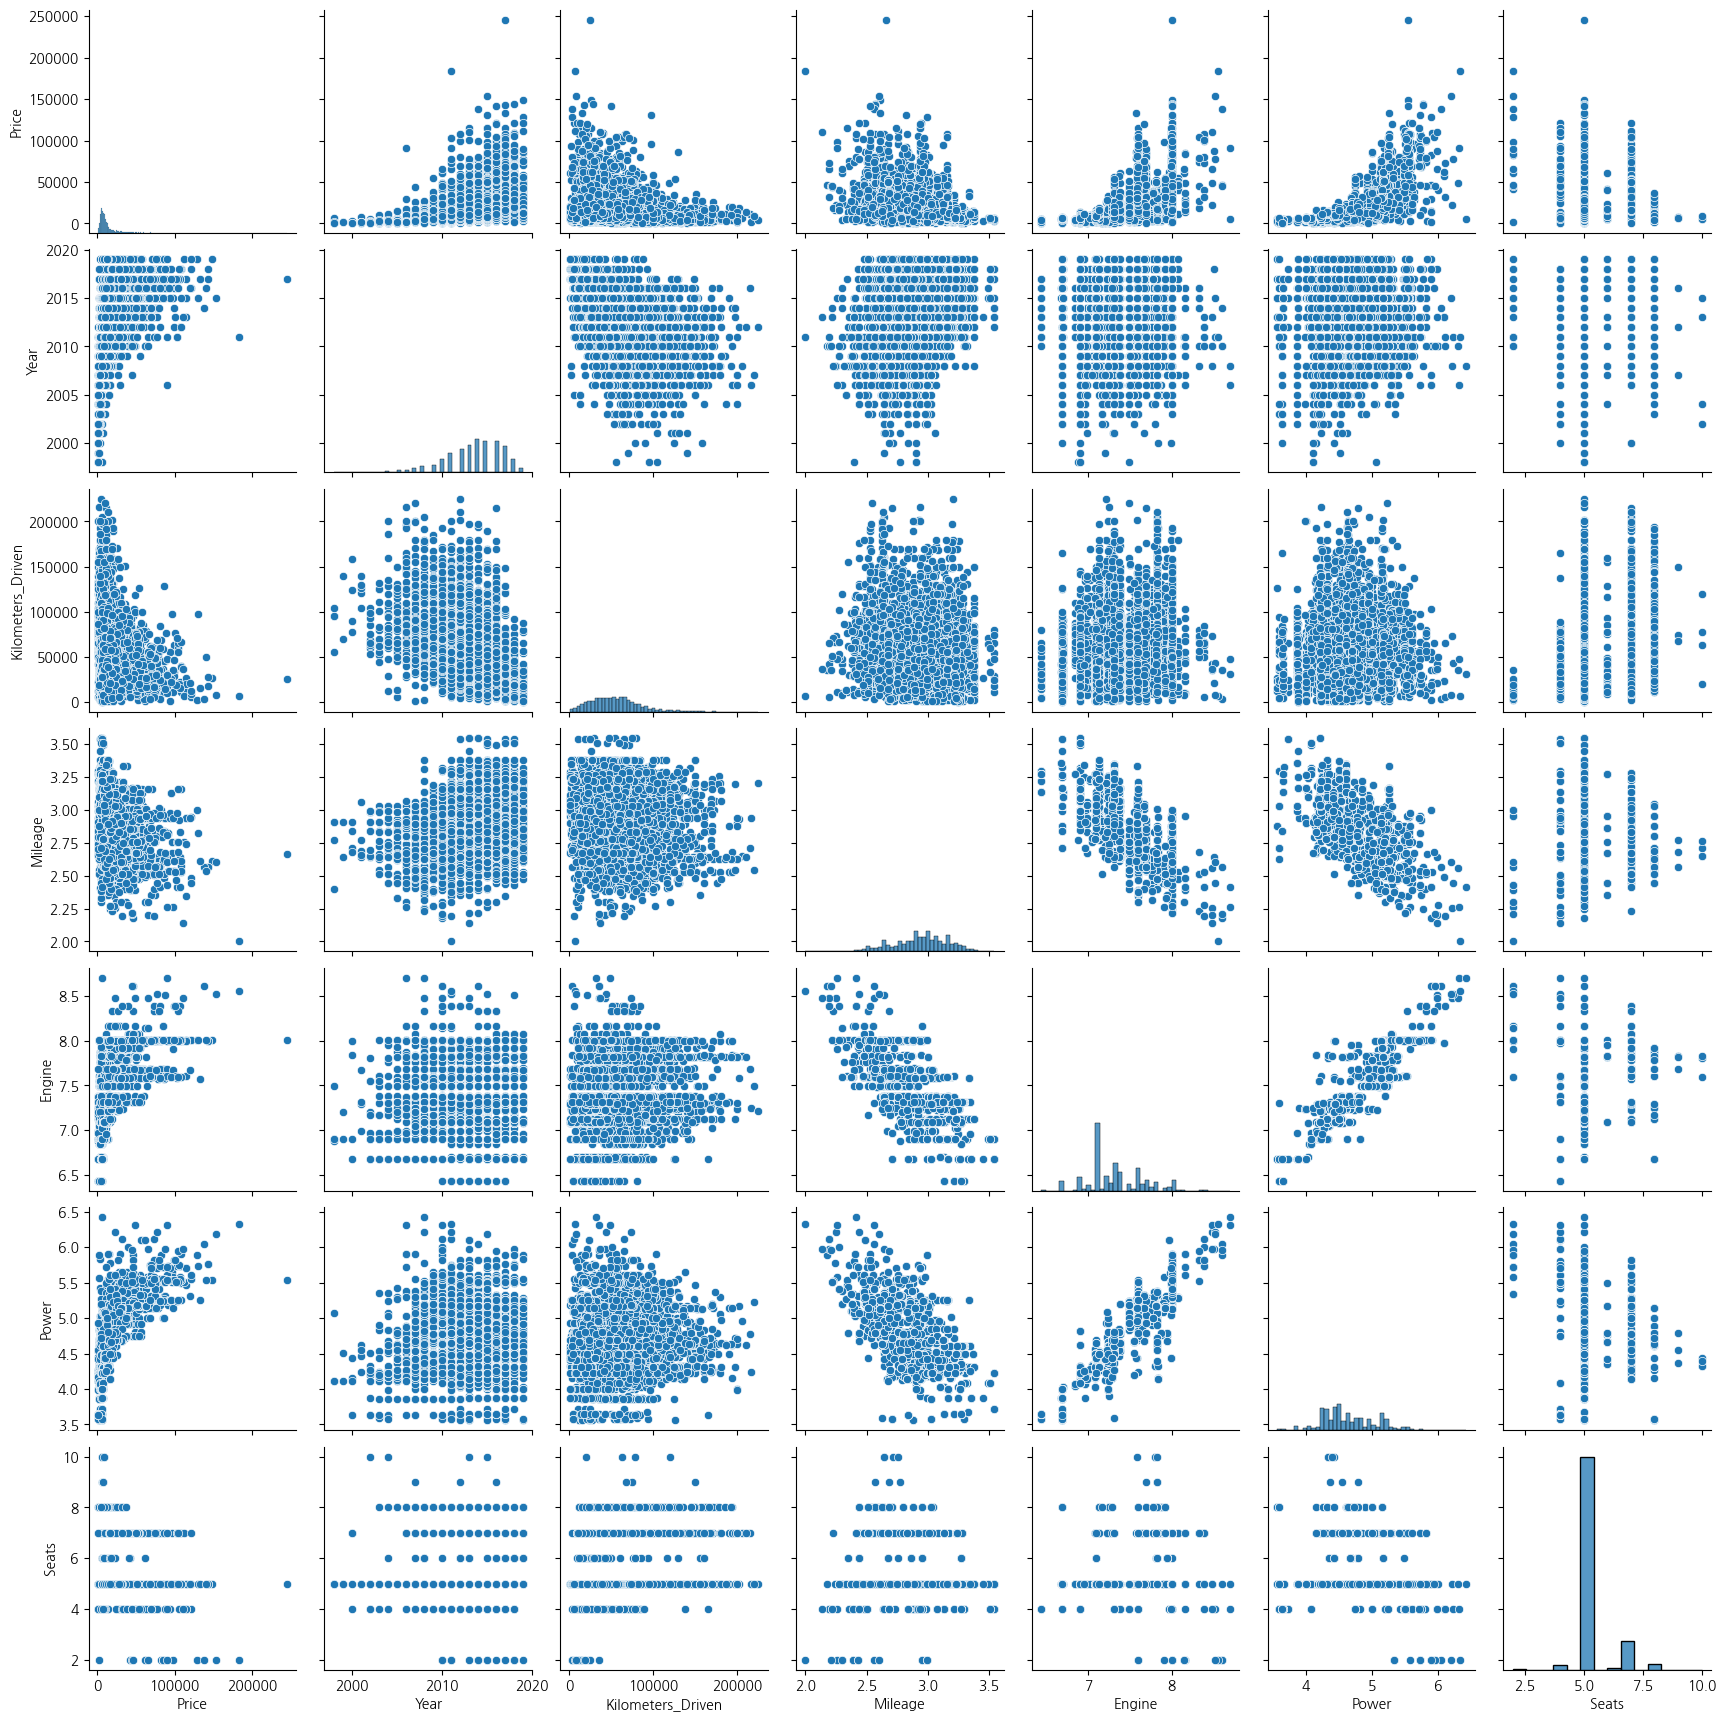

In [484]:
sns.pairplot(df)

engine과 power가 강한 상관관계를 보임으로 74개의 결측치는 engine의 회귀 분석을 통해 예측해 넣는게 좋다고 판단

In [485]:
train_df = df.dropna()

# 결측치가 있는 데이터 (예측해야 할 데이터)
test_df = df[df['Power'].isnull()]

# 독립변수(X)와 종속변수(y) 설정
X_train = train_df[['Engine']]  # 엔진을 독립변수로 사용
y_train = train_df['Power']     # Power를 종속변수로 사용

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 결측치가 있는 데이터 예측
X_test = test_df[['Engine']]
y_pred = model.predict(X_test)

y_pred

array([4.55214352, 4.27657399, 4.27657399, 4.27657399, 4.42785821,
       4.27657399, 4.42785821, 4.27657399, 4.27657399, 4.69551406,
       4.27657399, 4.55680065, 4.42785821, 4.27657399, 4.38245852,
       5.53019434, 4.52457269, 4.52457269, 4.42785821, 4.27657399,
       4.42261426, 4.42785821, 4.696877  , 5.19396434, 4.52457269,
       4.59933285, 5.0188087 , 4.42785821, 4.52457269, 5.53019434,
       4.52457269, 4.38245852, 4.55680065, 4.42785821, 4.42785821,
       4.27657399, 4.27657399, 4.27657399, 4.42785821, 4.42785821,
       4.42785821, 4.52457269, 4.55214352, 4.42785821, 5.11617823,
       4.55680065, 4.42785821, 5.11849276, 4.27657399, 4.47060269,
       4.52457269, 4.42785821, 4.69141497, 4.52457269, 4.47060269,
       4.52457269, 4.15368104, 5.0188087 , 4.27657399, 4.47060269,
       4.27657399, 4.27657399, 4.52457269, 4.42785821, 4.27657399,
       5.1835599 , 4.42785821, 4.27657399, 4.27657399, 4.27657399,
       4.27657399, 4.27657399, 4.82521719, 4.52457269])

In [486]:
df.loc[df['Power'].isnull(), 'Power'] = y_pred

In [487]:
df.isnull().sum()

Name                 0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Model                0
Income_Level         0
dtype: int64

## 파생변수 추가

In [488]:
current_year = 2024
df['car_age'] = current_year - df['Year']

# 주행 거리 대비 연식(연평균 주행 거리) 계산
df['yearly_mileage'] = df['Mileage'] / df['car_age']

<Axes: xlabel='yearly_mileage'>

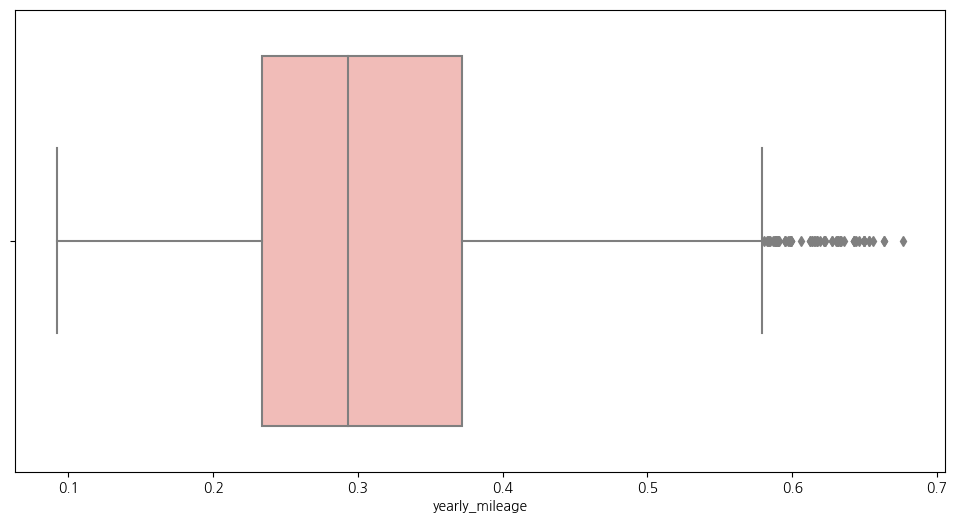

In [489]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="yearly_mileage", data=df, palette="Pastel1")

In [490]:
df[(df["Year"]>=2018) & (df['Mileage'] > df)]

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level,car_age,yearly_mileage
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


단기간에 높은 주행거리를 가진 차가 있을 확률이 높음

<Axes: xlabel='Mileage'>

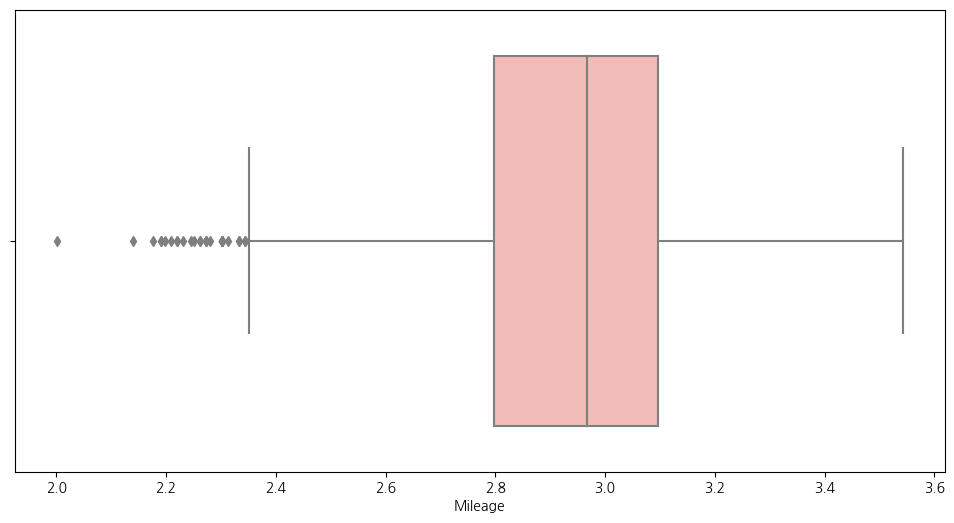

In [491]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Mileage", data=df, palette="Pastel1")

In [493]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Model', 'Income_Level'])
df_encoded.drop(columns=["Name"],inplace=True)
df_encoded.reset_index(inplace=True)
df_encoded

,index,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,car_age,yearly_mileage,...,Model_Hyundai,Model_Mahindra,Model_Maruti,Model_Mercedes-Benz,Model_Other,Model_Toyota,Model_Volkswagen,Income_Level_상 (부유한),Income_Level_중 (중산층),Income_Level_하 (저소득)
0,0,2682.68,2010,72000,3.317816,6.906755,4.080246,5.0,14,0.236987,...,0,0,1,0,0,0,0,1,0,0
1,1,19162.00,2015,41000,3.028683,7.367077,4.845761,5.0,9,0.336520,...,1,0,0,0,0,0,0,1,0,0
2,2,6898.32,2011,46000,2.954910,7.090077,4.496471,5.0,13,0.227301,...,0,0,0,0,0,0,0,0,1,0
3,3,9197.76,2012,87000,3.080533,7.130099,4.497139,7.0,12,0.256711,...,0,0,1,0,0,0,0,0,1,0
4,4,27194.71,2013,40670,2.785011,7.585281,4.954418,5.0,11,0.253183,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,7224,8477.27,2016,36000,3.036394,7.089243,4.219508,5.0,8,0.379549,...,0,0,0,0,1,0,0,0,1,0
6072,7228,10822.70,2016,41413,3.342155,6.954639,4.248495,5.0,8,0.417769,...,0,0,0,0,1,0,0,1,0,0
6073,7231,13474.72,2017,39015,2.890372,7.311886,4.806968,5.0,7,0.412910,...,0,0,0,0,0,0,0,0,1,0
6074,7232,27838.55,2018,6000,2.833213,7.221836,5.081404,5.0,6,0.472202,...,0,0,0,0,1,0,0,1,0,0


In [494]:
def z_score_normalization(df):
    scaler = StandardScaler()
    standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return standardized_data

z_score_scaled = z_score_normalization(df_encoded.iloc[:,3:10])
df_scaled = pd.concat([z_score_scaled , df_encoded.iloc[:,10:],df_encoded.loc[:,"Price"]],axis=1)
df_scaled

,Kilometers_Driven,Mileage,Engine,Power,Seats,car_age,yearly_mileage,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,...,Model_Mahindra,Model_Maruti,Model_Mercedes-Benz,Model_Other,Model_Toyota,Model_Volkswagen,Income_Level_상 (부유한),Income_Level_중 (중산층),Income_Level_하 (저소득),Price
0,0.502762,1.692256,-1.260205,-1.373794,-0.346320,1.094331,-0.712050,1,0,0,...,0,1,0,0,0,0,1,0,0,2682.68
1,-0.463723,0.391607,0.110742,0.486935,-0.346320,-0.465185,0.281951,0,1,0,...,0,0,0,0,0,0,1,0,0,19162.00
2,-0.307838,0.059742,-0.714229,-0.362080,-0.346320,0.782427,-0.808781,0,0,0,...,0,0,0,0,0,0,0,1,0,6898.32
3,0.970416,0.624849,-0.595035,-0.360454,2.154264,0.470524,-0.515072,0,1,0,...,0,1,0,0,0,0,0,1,0,9197.76
4,-0.474011,-0.704541,0.760605,0.751047,-0.346320,0.158621,-0.550307,0,1,0,...,0,0,0,1,0,0,0,1,0,27194.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,-0.619607,0.426294,-0.716712,-1.035291,-0.346320,-0.777089,0.711664,0,0,0,...,0,0,0,1,0,0,0,1,0,8477.27
6072,-0.450846,1.801744,-1.117595,-0.964831,-0.346320,-0.777089,1.093352,0,1,0,...,0,0,0,1,0,0,1,0,0,10822.70
6073,-0.525609,-0.230582,-0.053629,0.392641,-0.346320,-1.088992,1.044826,0,0,0,...,0,0,0,0,0,0,0,1,0,13474.72
6074,-1.554915,-0.487706,-0.321820,1.059712,-0.346320,-1.400895,1.636951,0,0,0,...,0,0,0,1,0,0,1,0,0,27838.55


In [495]:
df

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Model,Income_Level,car_age,yearly_mileage
0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,상 (부유한),14,0.236987
1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,상 (부유한),9,0.336520
2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,중 (중산층),13,0.227301
3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,중 (중산층),12,0.256711
4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Other,중 (중산층),11,0.253183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun GO T Petrol,8477.27,2016,36000,Petrol,Manual,First,3.036394,7.089243,4.219508,5.0,Other,중 (중산층),8,0.379549
7228,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,3.342155,6.954639,4.248495,5.0,Other,상 (부유한),8,0.417769
7231,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,Petrol,Manual,First,2.890372,7.311886,4.806968,5.0,Ford,중 (중산층),7,0.412910
7232,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,2.833213,7.221836,5.081404,5.0,Other,상 (부유한),6,0.472202


In [496]:
def z_score_normalization(df):
    scaler = StandardScaler()
    standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return standardized_data

z_score_scaled = z_score_normalization(df.select_dtypes('number')).reset_index()
df_scaled_ols=pd.concat([z_score_scaled, df.select_dtypes('object').reset_index()],axis=1).drop(columns=["index",'Name'],axis=1)
df_scaled_ols

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,car_age,yearly_mileage,Fuel_Type,Transmission,Owner_Type,Model,Income_Level
0,-0.694324,-1.094331,0.502762,1.692256,-1.260205,-1.373794,-0.346320,1.094331,-0.712050,CNG,Manual,First,Maruti,상 (부유한)
1,0.240315,0.465185,-0.463723,0.391607,0.110742,0.486935,-0.346320,-0.465185,0.281951,Diesel,Manual,First,Hyundai,상 (부유한)
2,-0.455230,-0.782427,-0.307838,0.059742,-0.714229,-0.362080,-0.346320,0.782427,-0.808781,Petrol,Manual,First,Honda,중 (중산층)
3,-0.324815,-0.470524,0.970416,0.624849,-0.595035,-0.360454,2.154264,0.470524,-0.515072,Diesel,Manual,First,Maruti,중 (중산층)
4,0.695897,-0.158621,-0.474011,-0.704541,0.760605,0.751047,-0.346320,0.158621,-0.550307,Diesel,Automatic,Second,Other,중 (중산층)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,-0.365679,0.777089,-0.619607,0.426294,-0.716712,-1.035291,-0.346320,-0.777089,0.711664,Petrol,Manual,First,Other,중 (중산층)
6072,-0.232656,0.777089,-0.450846,1.801744,-1.117595,-0.964831,-0.346320,-0.777089,1.093352,Diesel,Manual,First,Other,상 (부유한)
6073,-0.082244,1.088992,-0.525609,-0.230582,-0.053629,0.392641,-0.346320,-1.088992,1.044826,Petrol,Manual,First,Ford,중 (중산층)
6074,0.732413,1.400895,-1.554915,-0.487706,-0.321820,1.059712,-0.346320,-1.400895,1.636951,Petrol,Manual,First,Other,상 (부유한)


In [497]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# VIF 결과 출력
vif_result = calculate_vif(df_scaled.iloc[:,0:7])
vif_result

,Feature,VIF
0,Kilometers_Driven,1.601381
1,Mileage,2.520756
2,Engine,8.190095
3,Power,6.759607
4,Seats,1.660863
5,car_age,7.226621
6,yearly_mileage,7.868518


vif가 10이하임으로 모두 다중공산성을 만족한다고 볼 수 있다

In [499]:
import statsmodels.formula.api as smf

# 다중 선형 회귀 모델 수식 (범주형 변수 포함)
formula = "Price ~ Kilometers_Driven + Mileage + Engine + Power + Seats + car_age + yearly_mileage + \
           C(Fuel_Type) + C(Transmission) + C(Owner_Type) + C(Model) + C(Income_Level)"

# OLS 회귀 분석 수행
reg_model = smf.ols(formula=formula, data=df_scaled_ols)
reg_result = reg_model.fit()

# 회귀 분석 결과 출력
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     447.6
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:55:09   Log-Likelihood:                -5440.0
No. Observations:                6076   AIC:                         1.093e+04
Df Residuals:                    6050   BIC:                         1.111e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## 파생변수 추가